In [1]:
# import libraries
import requests
import json
import os
import re
from impo.impo import imp_inst as imp 
import datetime

imp.import_or_install('flask')
imp.import_or_install('pandas')
from flask import Flask, request, render_template, redirect, url_for, Markup
import pandas as pd
from lstm.lstm import Lstm

flask is already installed
pandas is already installed
pandas is already installed
scikit-learn is not installed, installing now...
scikit-learn has been installed
numpy is already installed
tensorflow is already installed
keras is already installed
matplotlib is already installed
plotly is already installed


In [2]:
def render_predictions(tickers):
    predictions_html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <title>Global</title>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="description" content="HTML5 website template">
  <meta name="keywords" content="global, template, html, sass, jquery">
  <meta name="author" content="Bucky Maler">
  <link rel="stylesheet" href="{{ url_for('static', filename='css/main.css') }}">
</head>
<body>

<!-- notification for small viewports and landscape oriented smartphones -->
<div class="device-notification">
  <a class="device-notification--logo" href="#0">
    <img src="{{ url_for('static', filename='img/logo.png') }}" alt="QuantAI">
    <p>QuantAI</p>
  </a>
  <p class="device-notification--message">Global has so much to offer that we must request you orient your device to portrait or find a larger screen. You won't be disappointed.</p>
</div>

<div class="perspective effect-rotate-left">
  <div class="container"><div class="outer-nav--return"></div>
    <div id="viewport" class="l-viewport">
      <div class="l-wrapper">
        <header class="header">
          <a class="header--logo" href="#0">
            <img src="{{ url_for('static', filename='img/logo.png') }}" alt="Global">
            <p>Global</p>
          </a>
          <button class="header--cta cta">Hire Us</button>
          <div class="header--nav-toggle">
            <span></span>
          </div>
        </header>
        <nav class="l-side-nav">
          <ul class="side-nav">
            <li class="is-active"><span>Home</span></li>
            <li><span>Predictions</span></li>
          </ul>
        </nav>
        <ul class="l-main-content main-content">

          <li class="l-section section section--is-active">
            <div class="intro">
              <div class="intro--banner">
                <h1>Predictions</h1>
                <button class="cta">Predictions
                  <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                  <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                    <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                  </g>
                  </svg>
                  <span class="btn-background"></span>
                </button>
                <img src="{{ url_for('static', filename='img/introduction-visual.png') }}" alt="Welcome">
              </div>
              <div class="intro--options">
                <a href="#0">
                  <h3>Scroll &amp; Down to see the predictions</h3>
                  
                </a>
              </div>
            </div>
          </li>

          <li class="l-section section">
            <div class="intro">
              <h2>Predictions</h2>
              <div class="work--lockup">
                <ul class="slider">
    """
    positions = ['left', 'center', 'right']
    i = 0
    for ticker in tickers:
        ticker_str = "{"
        ticker_str += f"{{ url_for('static', filename='img/{str(ticker)}.png') }}"
        ticker_str += "}"
        predictions_html += f"""
         <li class="slider--item slider--item-{str(positions[i])}">
                            <a href="#0">
                              <div class="slider--item-image">
                                <img src="{str(ticker_str)}" alt="Victory">
                              </div>
                              <p class="slider--item-title">{str(ticker)}</p>
                            </a>
                          </li>    
                          
        """
        i += 1
                      
    predictions_html += """
                    </ul>

                          <style>

                            .slider--item-image img {
                              transition: transform 0.3s;
                            }

                            .slider--item-image img:hover {
                              transform: scale(1.2);
                            }

                          </style>

                    <div class="slider--prev">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
                      viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M561,1169C525,1155,10,640,3,612c-3-13,1-36,8-52c8-15,134-145,281-289C527,41,562,10,590,10c22,0,41,9,61,29
                        c55,55,49,64-163,278L296,510h575c564,0,576,0,597,20c46,43,37,109-18,137c-19,10-159,13-590,13l-565,1l182,180
                        c101,99,187,188,193,199c16,30,12,57-12,84C631,1174,595,1183,561,1169z"/>
                      </g>
                      </svg>
                    </div>

                    <div class="slider--next">
                      <svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 150 118" style="enable-background:new 0 0 150 118;" xml:space="preserve">
                      <g transform="translate(0.000000,118.000000) scale(0.100000,-0.100000)">
                        <path d="M870,1167c-34-17-55-57-46-90c3-15,81-100,194-211l187-185l-565-1c-431,0-571-3-590-13c-55-28-64-94-18-137c21-20,33-20,597-20h575l-192-193C800,103,794,94,849,39c20-20,39-29,61-29c28,0,63,30,298,262c147,144,272,271,279,282c30,51,23,60-219,304C947,1180,926,1196,870,1167z"/>
                      </g>
                      </svg>
                    </div>
                  </div>
                </div>
              </li>
            </ul>
          </div>
        </div>
      </div>
      <ul class="outer-nav">
        <li class="is-active">Home</li>
        <li >Predictions</li>
      </ul>
    </div>

    <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js"></script>
    <script>window.jQuery || document.write("<script src='{{ url_for('static', filename='js/vendor/jquery-2.2.4.min.js') }}'><\/script>")</script>
    <script src="{{ url_for('static', filename='js/functions-min.js') }}"></script>
    </body>
    </html>
    """
    return predictions_html

 * Serving Flask app 'Stock Predictions'
 * Debug mode: off


 * Running on http://localhost:5001
Press CTRL+C to quit
127.0.0.1 - - [14/May/2023 23:39:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/logo.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/introduction-visual.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/js/functions-min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/work-victory.jpg HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/work-metiew-smith.jpg HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/work-alex-nowak.jpg HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/about-visual.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/contact-visual.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:39:58] "GET /static/img/about-winners.jpg HTTP/1.1" 200 -
127.0.0.1 - 

"Selected stocks: ['MSFT', 'AMZN', 'NVDA']"

'Selected time range: 3'

'Custom model: None'


lstm intance initialized
MSFT data imported. Size: (1259, 34)
MSFT size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


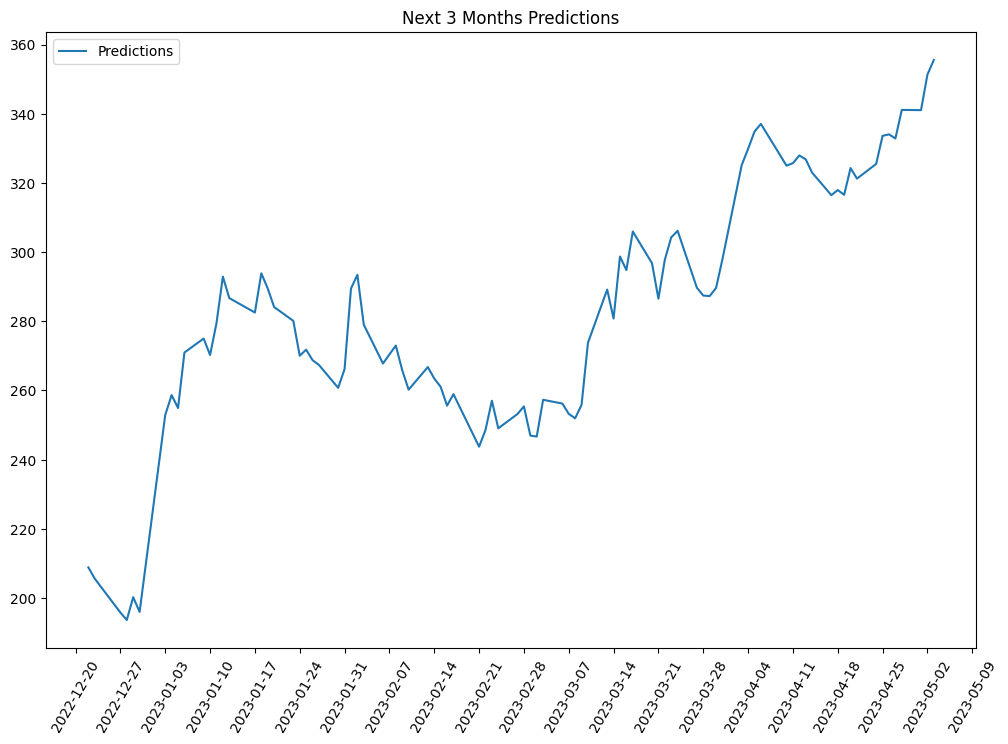


lstm intance initialized
AMZN data imported. Size: (1259, 34)
AMZN size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


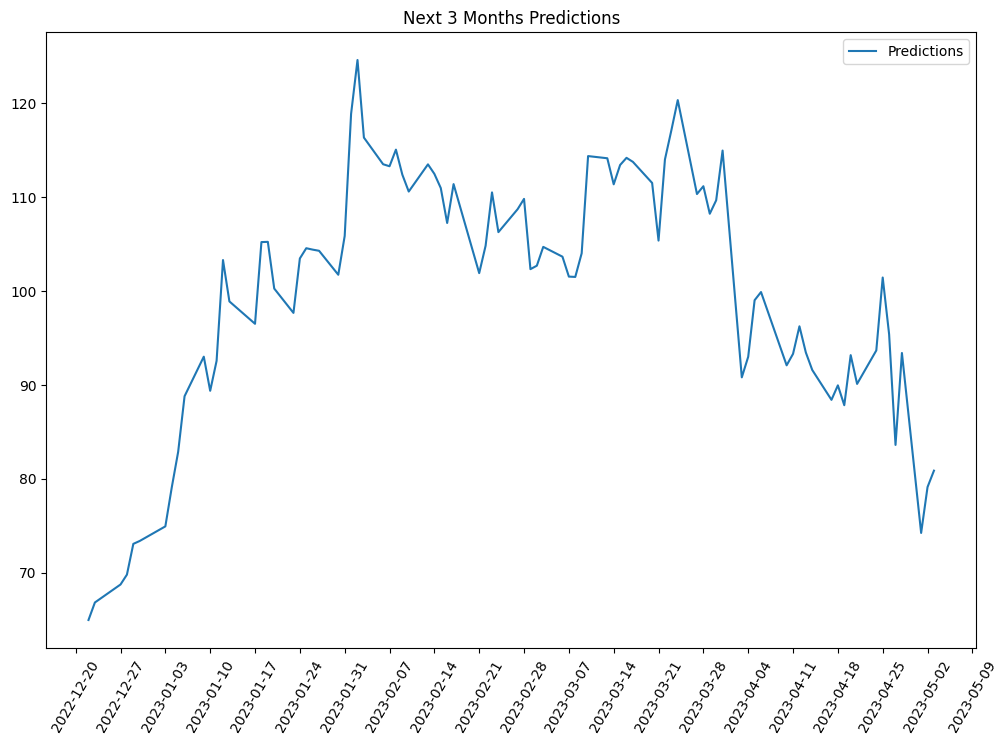


lstm intance initialized
NVDA data imported. Size: (1259, 34)
NVDA size: (1259, 34)
3/3 [==============================] - 0s 1ms/step


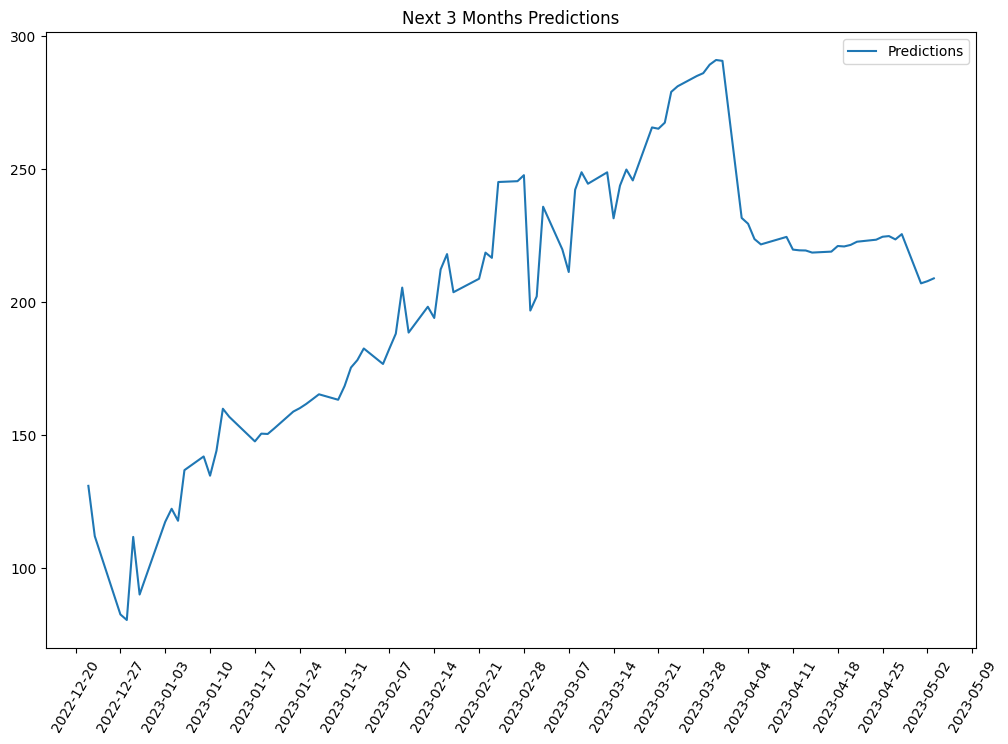

127.0.0.1 - - [14/May/2023 23:51:51] "POST /demo HTTP/1.1" 302 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/img/NVDA.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/img/MSFT.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/img/AMZN.png HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/css/fonts/Montserrat-Bold.woff HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:51:51] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 30

overwritten


127.0.0.1 - - [14/May/2023 23:52:28] "GET /predictions HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/img/logo.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/js/functions-min.js HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/img/introduction-visual.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/img/MSFT.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/img/NVDA.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/img/AMZN.png HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/css/fonts/Montserrat-Light.woff HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/css/fonts/Montserrat-Black.woff HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/css/fonts/Montserrat-Regular.woff HTTP/1.1" 304 -
127.0.0.1 - - [14/May/2023 23:52:28] "GET /static/css/font

In [ ]:
app = Flask("Stock Predictions", static_folder='static')
app.config['TEMPLATES_AUTO_RELOAD'] = True
        
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predictions')
def predictions():
    return render_template('predictions.html')

@app.route('/demo', methods=['GET', 'POST'])
def demo():
    if request.method == 'POST':
        tickers = request.form.getlist('stock-name')
        time = int(request.form.get('time-name'))
        toggle = request.form.get('model-name-toggle')
        layers = int(request.form.get('model-1'))
        lr = float(request.form.get('model-2'))
        early_stopping = int(request.form.get('model-3'))
        epochs = int(request.form.get('model-4'))
        
        display(f"Selected stocks: {tickers}")
        display(f"Selected time range: {time}")
        display(f"Custom model: {toggle}")

        if toggle is None:
            for ticker in tickers:
                # Still need to define time in lstm.py
                lstm = Lstm(ticker, time)
                lstm.predict()
                lstm.plot_preds()
        else:
            for ticker in tickers:
                lstm = Lstm(ticker, time)
                lstm.train_lstm(layers=layers, 
                                lr=lr, 
                                early_stopping=early_stopping, 
                                epochs=epochs,
                                save='Off')
                lstm.predict()
                lstm.plot_preds()

        
        if toggle is None:
            pass
        else:
            display(f"Number of LSTM layers: {layers}")
            display(f"Learning rate: {lr}")
            display(f"Early Stopping: {early_stopping}")
            display(f"Number of Epochs: {epochs}")

        #predictions_html_new = render_template(predictions_html)
        #return render_template('predictions.html')
        f = open('templates/predictions.html', 'w')
        f.write(Markup(render_predictions(tickers)))
        f.flush()
        f.close()
        print("overwritten")
        return redirect(url_for('predictions'))
    else:
        return render_template('demo.html')



if __name__ == '__main__':
    app.run(host='localhost', port=5001)